# Luis Wen

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
#from .code import project_functions1_Luis

ImportError: attempted relative import with no known parent package

## Research question/interests

## **How does the global offense influence the outcome of matches between countries attending the 2022 world cup?**

#### Analysis plan: I will add a column noting the difference between the previous measurement of global offense (global_o) and the current one, noting if it increase or decreased. With this new column, I will create a data visualization plot to compare the relationship between the difference in offense with the simulated wins (sim_wins). Furthermore, comparing this graph with the score of the match to see if a higher offense leads to more goals scored will be helpful in determining how exactly does a team's offense can affect matches.

In [ ]:
dfP = pd.read_csv('../data/raw/wc_forecasts.csv')
dfM = pd.read_csv('../data/raw/wc_matches.csv')
dfP.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-18 17:56:03 UTC,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2022-12-18 17:56:44 UTC
1,2022-12-18 17:56:03 UTC,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2022-12-18 17:56:44 UTC
2,2022-12-18 17:56:03 UTC,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
3,2022-12-18 17:56:03 UTC,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
4,2022-12-18 17:56:03 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC


In [ ]:
import numpy as np 
# Initial forecast dataset includes the winners of each group, and the tournament winner (Argentina)
# I dropped columns I thought were irrelevant for the summary of the dataset
dfP2 = dfP.drop(columns=['forecast_timestamp', 'group', 'timestamp'])
# Row 161-256 are the rows in which the actual predictions were made, as they were being updated after each match outcome
dfP3 = dfP2.loc[161:256]
dfP3.describe(include=np.number).T
# 95 predictions were made withing this range of rows

,count,mean,std,min,25%,50%,75%,max
spi,95.0,73.935593,10.996478,48.16112,66.022585,74.29647,81.697265,93.65727
global_o,95.0,2.104278,0.501709,1.27862,1.682725,1.98575,2.505085,3.22213
global_d,95.0,0.691459,0.195907,0.26042,0.573690,0.68239,0.790620,1.31642
sim_wins,95.0,1.071339,0.613418,0.03652,0.581380,1.05175,1.516730,2.64890
sim_ties,95.0,0.828097,0.432743,0.14240,0.526615,0.77856,1.195950,2.31530
sim_losses,95.0,1.100564,0.602639,0.07083,0.623085,1.10635,1.535675,2.77578
sim_goal_diff,95.0,-0.052078,3.008571,-10.08883,-1.506450,-0.15400,1.363210,8.54154
goals_scored,95.0,3.749266,1.902778,0.60432,2.471240,3.31309,4.663180,10.60562
goals_against,95.0,3.801344,1.786856,0.96686,2.543020,3.63598,4.403200,11.38781
group_1,95.0,0.242156,0.269645,0.00000,0.029340,0.13455,0.358625,0.99992


In [ ]:
dfP2.describe(exclude=np.number).T
# An initial observation of of the filtered dataset is the unique teams attending the 2022 World Cup

,count,unique,top,freq
team,256,32,Argentina,8


In [ ]:
dfM2 = dfM.drop(columns=['league_id', 'league'])
# Dropping columns like league, and league_id since they are 'extra'
dfM2.describe(include=np.number).T
# Simple summary of the dataframe 

,count,mean,std,min,25%,50%,75%,max
spi1,64.0,77.321094,11.158028,48.1600,68.747500,78.72500,87.232500,93.6600
spi2,64.0,74.295781,10.785255,48.4600,66.052500,74.46000,79.505000,93.4800
prob1,64.0,0.443198,0.204479,0.0363,0.285125,0.44595,0.607025,0.8261
prob2,64.0,0.358316,0.195187,0.0595,0.203875,0.31215,0.504700,0.8112
probtie,64.0,0.198484,0.122114,0.0000,0.108150,0.25750,0.291175,0.3371
proj_score1,64.0,1.325312,0.476821,0.3100,0.985000,1.31500,1.620000,2.6000
proj_score2,64.0,1.139219,0.434596,0.4400,0.820000,1.05500,1.367500,2.5500
score1,64.0,1.578125,1.551289,0.0000,0.000000,1.00000,2.000000,7.0000
score2,64.0,1.109375,1.055856,0.0000,0.000000,1.00000,2.000000,4.0000
xg1,64.0,1.075469,0.725199,0.0700,0.600000,0.88500,1.430000,3.1000


In [ ]:
dfM2.describe(exclude=np.number).T

,count,unique,top,freq
date,64,23,2022-12-01,4
team1,64,32,Argentina,5
team2,64,32,Morocco,4


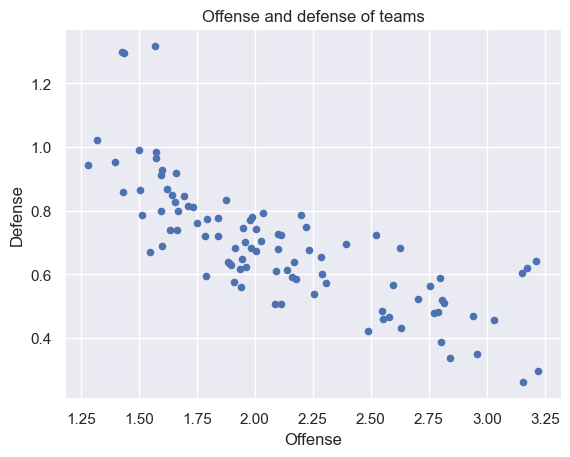

In [ ]:
dfP3.plot(kind='scatter', x='global_o', y='global_d').set(title="Offense and defense of teams", xlabel="Offense", ylabel="Defense")

sns.despine()

Text(0.5, 0.98, 'Relationship between predictive factors')

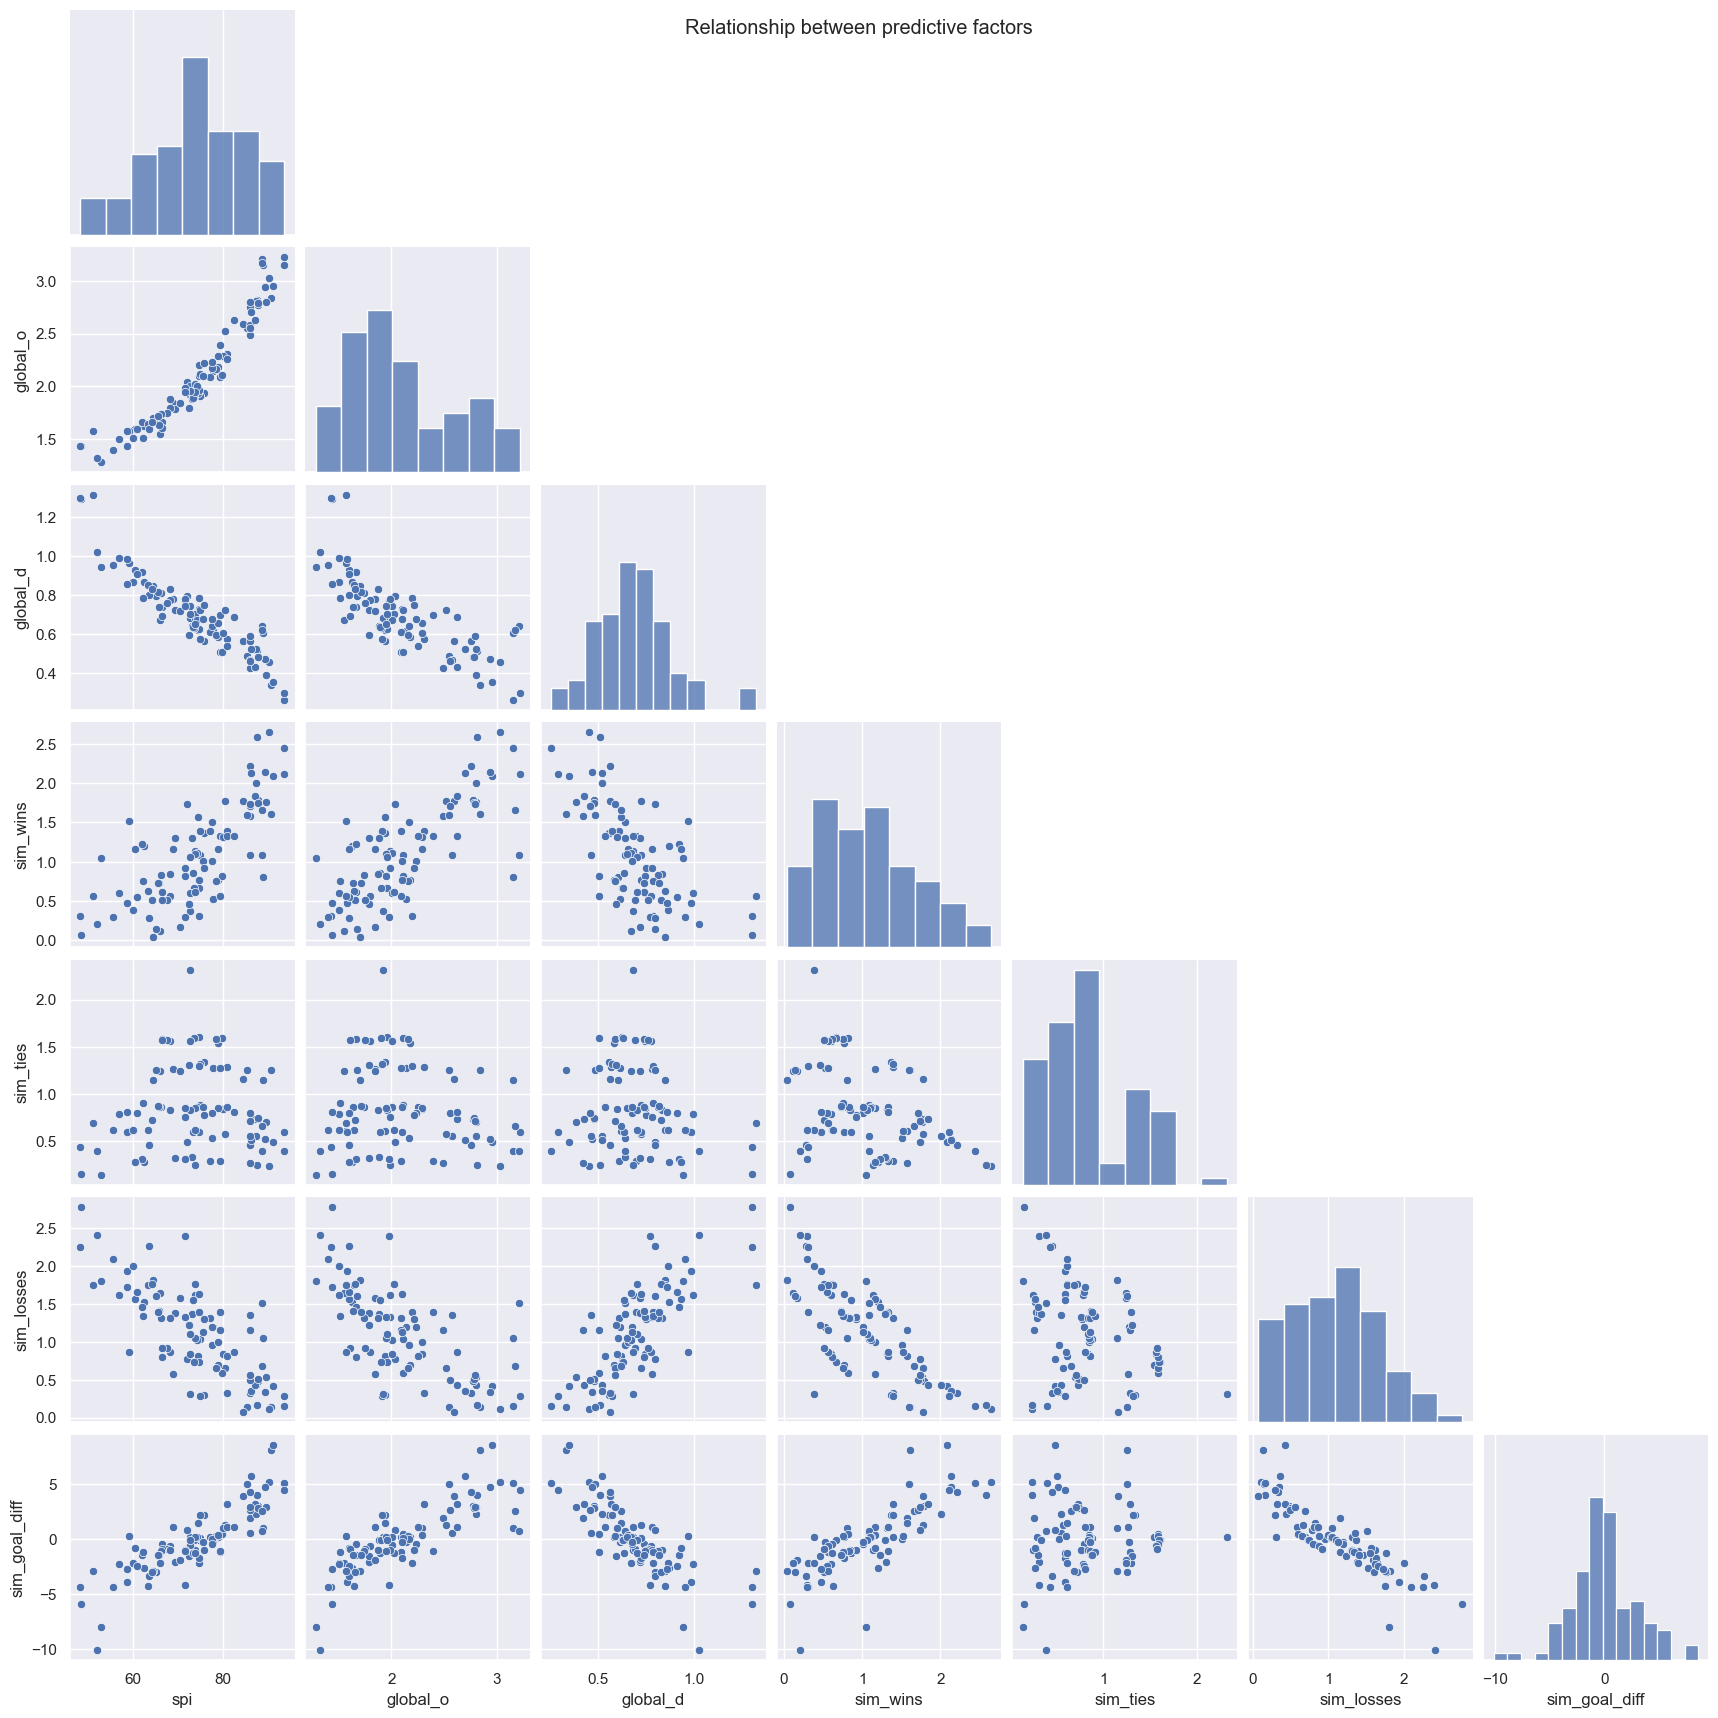

In [ ]:
predictions = sns.pairplot(data=dfP3, vars=['spi', 'global_o', 'global_d', 'sim_wins', 'sim_ties', 'sim_losses', 'sim_goal_diff']
             , corner=True)
predictions.fig.suptitle("Relationship between predictive factors")

<seaborn.axisgrid.FacetGrid>

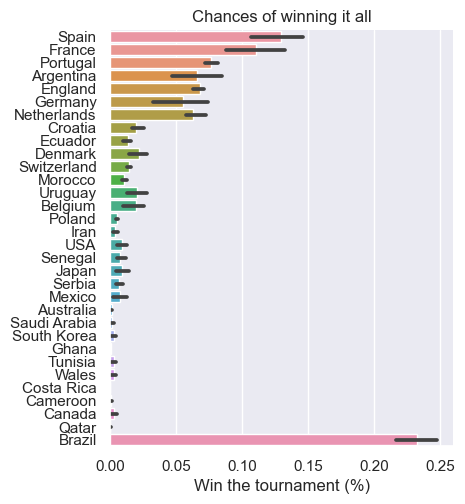

In [ ]:
sns.catplot(data=dfP3, y='team', x='win_league', kind='bar').set(title="Chances of winning it all", 
                                                                 xlabel="Win the tournament (%)", ylabel="")

Text(0.5, 0.98, 'Adjusted metrics after matches')

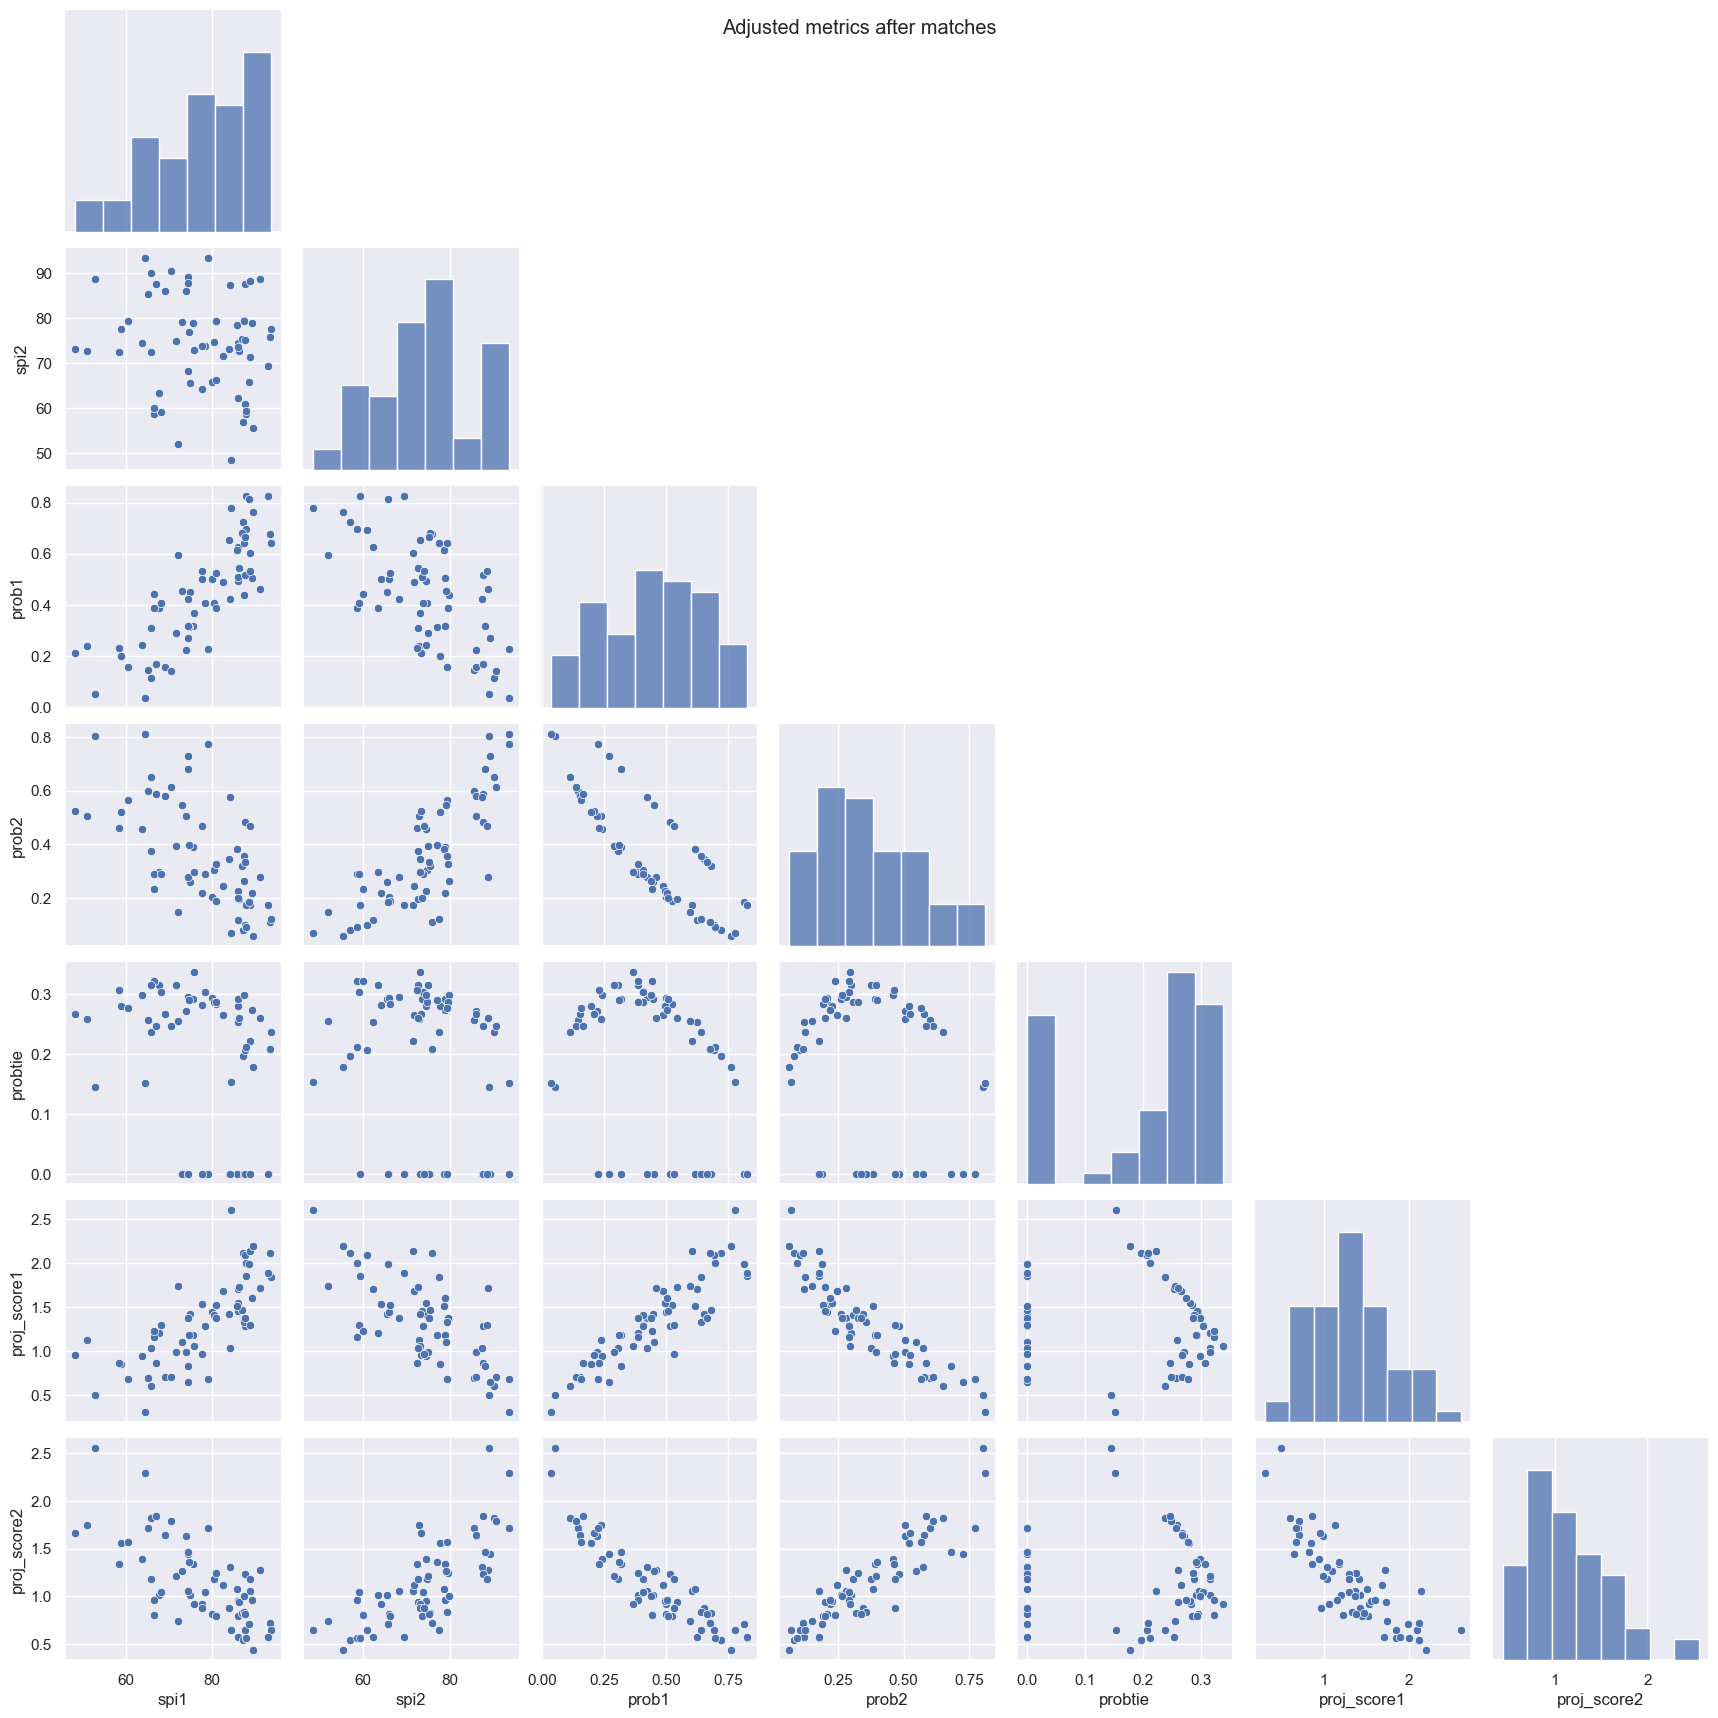

In [ ]:
matches = sns.pairplot(data=dfM2, vars=['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2']
             , corner=True)
matches.fig.suptitle("Adjusted metrics after matches")

### Findings of the exploratory analysis

The amount of teams attending the 2022 World Cup was 32.

Few teams have a high defense (above 0.8), while most teams their offense around 1.5 to 2.25. This suggests that teams attending the tournament focused more on scoring goals than defending the opposing team.

A detail to note is the team's offense increase alongside the Soccer Power Index, and team's defense decrease alongside the Soccer Power Index.
Higher offense implies a higher amount of goals scored meanwhile, higher defense depicts that the opposing team will score less goals.
Most bar plots have a bell shaped distribution where the highest is in the middle (the peak) or near the middle.

The initial chances of winning the entire tournament for the teams attenting the 2022 World Cup before playing the tournament. 
Brazil, Spain, and France are the teams with the highest possibility to win it all

There is no clear trend for the Soccer Power Index for both team1 and team2.
The probability of each team winning is distributed close to evenly.
The projected scores and probability to tie are nearly identical.
The projected score and Soccer Power Index increases based on a higher offensive rating.
Team 1 had a higher amount of teams with projected scores higher than team 2.

### After doing the Exploratory Data Analysis

My refined research question will be:

**How does the offensive rating of a team impact the matches as the tournament progresses?**

Knockout stage (round of 16 and above)

Since the winners of each match goes on to play more matches, and the player's body accumulates fatigue, how will this exhaustion affect the offensive rating of the teams still playing. Another external factor to consider will be pressure to perform when the stakes are high. How will pressure affect teams still in contention of winning the tournament?

Revised analysis plan

I will calculate the overall offensive capability of teams after each round (Knockout stage), and see if there is any difference (likely) and how big or small is that change (in offensive rating).
To calculate the offensive capabilty of teams, I will average the overall rating of players on each team. 

In [11]:
# Data Analysis Pipeline

# Load datasets
dfP = pd.read_csv('../data/raw/wc_forecasts.csv')
dfM = pd.read_csv('../data/raw/wc_matches.csv')
dfS = pd.read_csv('./ungraded/players_22.csv')

# Skip rows and columns as needed
dfPredictions = dfP[['forecast_timestamp','team', 'spi', 'global_o', 'global_d','sim_wins','sim_ties','sim_losses','sim_goal_diff']]
dfMatches = dfM[['team1','team2','spi1','spi2','score1','score2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']]
dfStats = dfS[['short_name','age','height_cm','weight_kg','nationality_name','overall','preferred_foot']]

# Clean data
predictions_round_of_16 = ['Argentina','France','Morocco','Croatia','Portugal','Switzerland','Spain','Poland','England','Senegal','Netherlands','USA','Australia','Brazil','South Korea','Japan']

dfPredictions = dfPredictions.dropna(axis=0)
dfMatches = dfMatches.dropna(axis=0)
dfStats = dfStats.dropna(axis=0)

# Process data
dfPredictions = dfPredictions.rename(columns={'global_o':'offense','global_d':'defense'})
dfPredictions = dfPredictions.loc[0:111]
dfPredictions = dfPredictions[dfPredictions['team'].isin(predictions_round_of_16)]
dfMatches = dfMatches.rename(columns={'team1':'home_team1', 'team2':'away_team2'})
dfMatches = dfMatches.loc[48:63]
dfStats = dfStats.rename(columns={'short_name':'name', 'nationality_name':'nationality'})
team1_offense = [2.54424,2.5762,2.80437,2.65733,2.04074,3.17048,1.80298,2.89158,2.17124,2.52711,1.79236,2.71564,2.69895,2.89548,2.20264,2.8361]
team2_offense = [1.95077, 1.62507, 1.84609, 1.95825, 2.16748, 1.95504, 2.59723, 2.18629, 3.122, 2.58007, 2.78069, 2.86212, 2.20264, 1.74313, 1.74313, 2.96765]
match_winner = ['team1', 'team1', 'team1', 'team1', 'team2', 'team1', 'team1', 'team1', 'team1', 'team2', 'team1', 'team2', 'team1', 'team1', 'team1', 'team1']
offensive_difference = [0.59347, 0.95113, 0.95828, 0.69908, -0.12674, 1.21544, -0.79425, 0.70529, -0.95076, -0.05296, -0.98833, -0.14648, 0.49631, 1.15235, 0.45951, -0.13155]
dfMatches = ( dfMatches.assign(home_offense=team1_offense, away_offense=team2_offense, winner=match_winner,offensive_diff=offensive_difference))
teams_round_of_16 = ['Argentina','France','Morocco','Croatia','Portugal','Switzerland','Spain','Poland','England','Senegal','Netherlands','United States','Australia','Brazil','Korea Republic','Japan']
dfStats = dfStats[dfStats['nationality'].isin(teams_round_of_16)]

# Wrangle data
dfAverageStats = dfStats.groupby(by='nationality').mean()
dfAverageStats = dfAverageStats.sort_values('overall', ascending=False).reset_index()
df_Merged = pd.merge(right=dfAverageStats, left=dfPredictions, how='outer', left_on='offense', right_on='overall')


/var/folders/_3/b_dgxxbj3mq699p31rr8dzgm0000gn/T/ipykernel_86008/2944676052.py:6: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  dfS = pd.read_csv('./ungraded/players_22.csv')
/var/folders/_3/b_dgxxbj3mq699p31rr8dzgm0000gn/T/ipykernel_86008/2944676052.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfAverageStats = dfStats.groupby(by='nationality').mean()


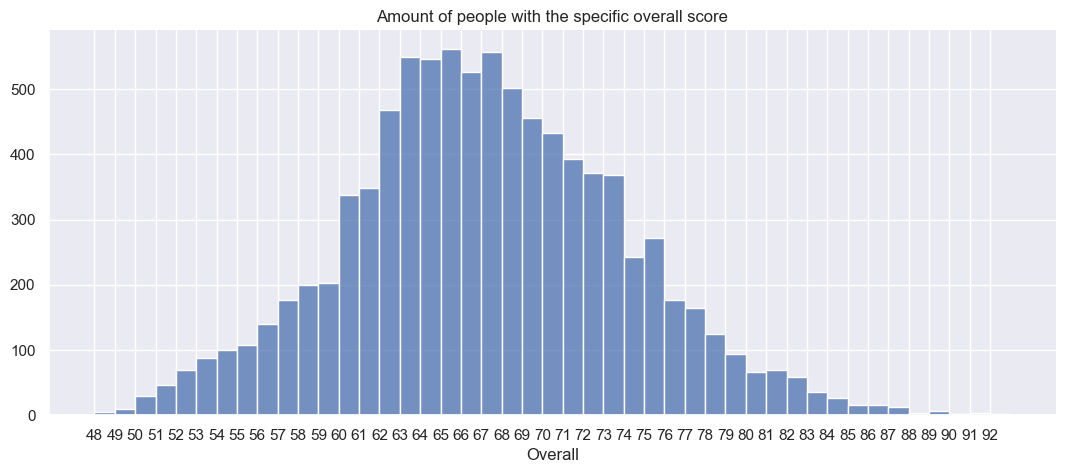

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))

sns.histplot(data=dfStats, x = 'overall', binwidth = 1).set(title="Amount of people with the specific overall score", xlabel = "Overall", ylabel="")

bins = np.arange(dfStats['overall'].min(), dfStats['overall'].max(), 1)

plt.xticks(bins)

sns.despine()


### Observations

The amount of people with an overall rating (combining offensive and defensive ratings) from the dataset containing players stats. These include previous players that player in the World Cup and current players playing in the World Cup. Most players have an overall from 60-74, very players have an overall rating of 80+.

In [12]:
dfStatsHighestOverall = dfStats.drop_duplicates('nationality')
# filter any duplicates inside the nationality column

dfStatsHighestOverall['name & country'] = dfStats['name'] + ' - ' + dfStats['nationality']
# created a new column and assigned it the concatenation of two other string columns for easier access

/var/folders/_3/b_dgxxbj3mq699p31rr8dzgm0000gn/T/ipykernel_86008/3858620809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfStatsHighestOverall['name & country'] = dfStats['name'] + ' - ' + dfStats['nationality']


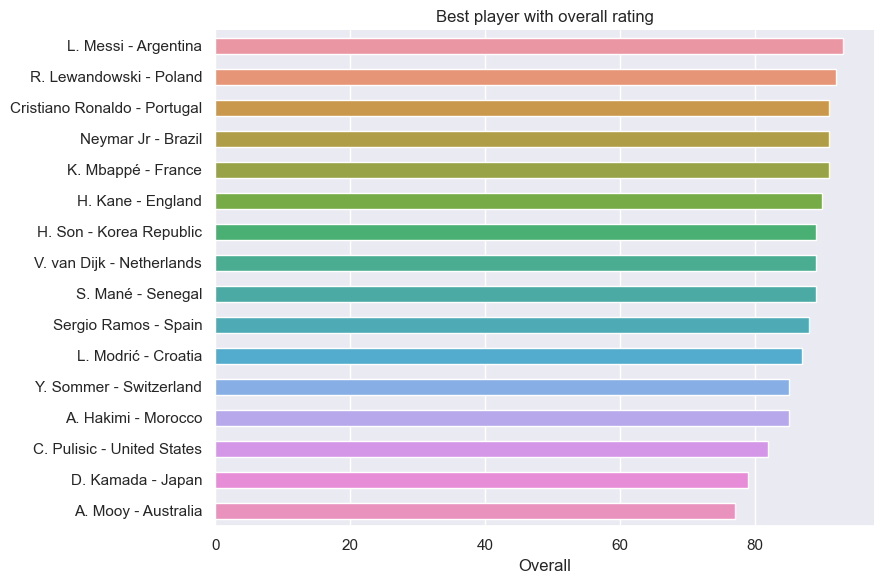

In [ ]:
fig, ax = plt.subplots(figsize=(9,6), tight_layout = True)

sns.barplot(dfStatsHighestOverall, x='overall', y='name & country', width=0.5).set(title="Best player with overall rating", xlabel="Overall", ylabel="")

sns.despine()

### Observations

The best player with the highest overall rating from each team playing in the knockout stage. Argentina, Poland, Portugal, Brazil, and France are the teams with the player's highest overall rating in the 2022 World Cup. One thing to note is that most of these teams have their best player's overall rating above 80, with the exception of Japan and Australia.

In [ ]:
#dftest = project_functions1_Luis.load_and_process('../data/raw/wc_matches.csv')

# import does not work

In [13]:
team1_offense = [2.54424,2.5762,2.80437,2.65733,2.04074,3.17048,1.80298,2.89158,2.17124,2.52711,1.79236,2.71564,2.69895,2.89548,2.20264,2.8361]
team2_offense = [1.95077, 1.62507, 1.84609, 1.95825, 2.16748, 1.95504, 2.59723, 2.18629, 3.122, 2.58007, 2.78069, 2.86212, 2.20264, 1.74313, 1.74313, 2.96765]
match_winner = ['team1', 'team1', 'team1', 'team1', 'team2', 'team1', 'team1', 'team1', 'team1', 'team2', 'team1', 'team2', 'team1', 'team1', 'team1', 'team1']
offensive_difference = [0.59347, 0.95113, 0.95828, 0.69908, -0.12674, 1.21544, -0.79425, 0.70529, -0.95076, -0.05296, -0.98833, -0.14648, 0.49631, 1.15235, 0.45951, -0.13155]
stage = ['Round of 16','Round of 16','Round of 16','Round of 16','Round of 16','Round of 16','Round of 16','Round of 16','Quarter-final','Quarter-final','Quarter-final','Quarter-final','Semi-final','Semi-final','Third place decider','Final']

dfMatches = ( dfMatches.assign(home_offense=team1_offense, away_offense=team2_offense, winner=match_winner,offensive_diff=offensive_difference, stage=stage))

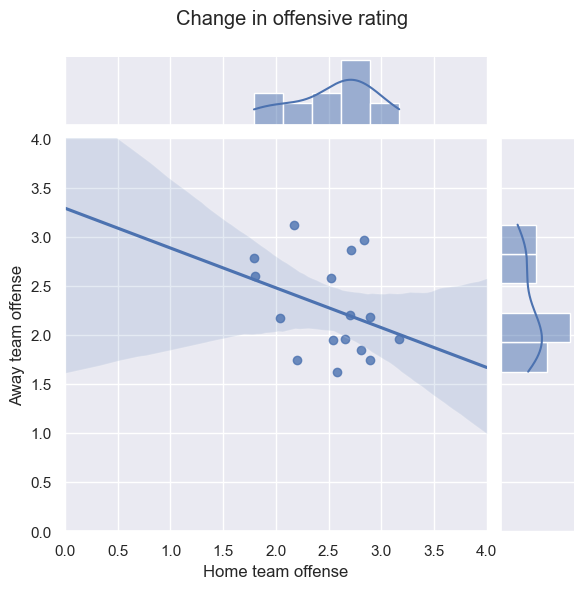

In [ ]:
jointplot = sns.jointplot(data=dfMatches, x='home_offense', y='away_offense', kind="reg", truncate=False, xlim=(0,4), ylim=(0,4))
jointplot.set_axis_labels('Home team offense', 'Away team offense', fontsize=12)
jointplot.fig.suptitle("Change in offensive rating")
jointplot.fig.subplots_adjust(top=0.90)

### Observations

The general trend of the offensive rating for the away team and home team. It is decreasing for the away teams, but increasing for the home teams. This highlights that the away teams are the ones being sent home, because after losing the match, the offensive rating will likely decrease too. On the other hand, the home teams win matches and may or may not increase their offensive rating.

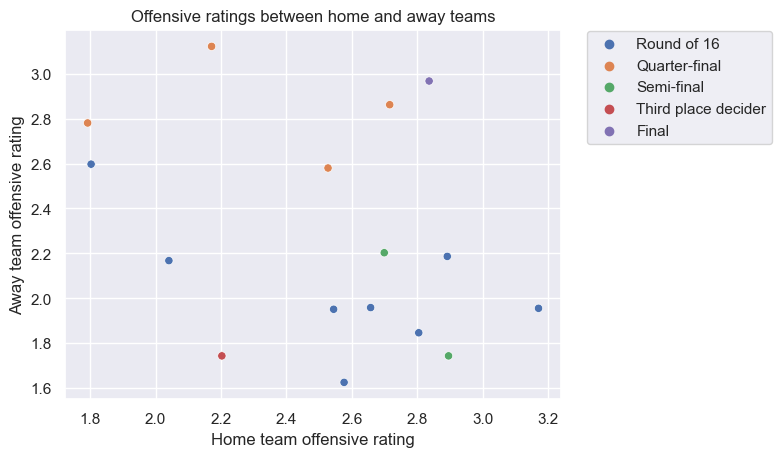

In [36]:

sns.scatterplot(data=dfMatches, x='home_offense', y='away_offense', hue='stage').set(title="Offensive ratings between home and away teams", xlabel= "Home team offensive rating", ylabel="Away team offensive rating")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.1)

### Observations

The offensive rating for the away and home teams with each round having a different color in the graph. The highest offensive rating was near 3.2 in the round of 16 (home team), and quarter-final (away team) and the lowest offensive rating was near 2.0 in the third place decider (home team), and near 2.2 in the round of 16 (away team).

In [35]:
dfArgentina = dfMatches.loc[(dfMatches['home_team1'] == 'Argentina') | (dfMatches['away_team2'] == 'Argentina')]
dfMorocco = dfMatches.loc[(dfMatches['home_team1'] == 'Morocco') | (dfMatches['away_team2'] == 'Morocco')]
dfCroatia = dfMatches.loc[(dfMatches['home_team1'] == 'Croatia') | (dfMatches['away_team2'] == 'Croatia')]
dfFrance = dfMatches.loc[(dfMatches['home_team1'] == 'France') | (dfMatches['away_team2'] == 'France')]

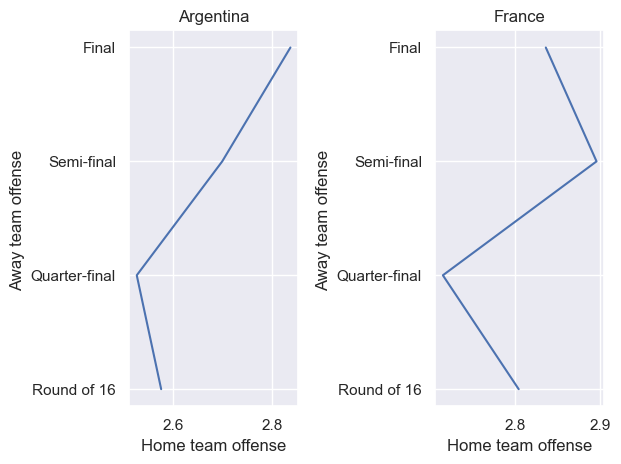

In [ ]:
plt.tight_layout()

plt.subplot(1,2,1)
plt.plot('home_offense', 'stage', data=dfArgentina)
plt.title("Argentina")
plt.xlabel('Home team offense')
plt.ylabel('Away team offense ')

plt.subplot(1,2,2)
plt.plot('home_offense', 'stage', data=dfFrance)
plt.title("France")
plt.xlabel('Home team offense')
plt.ylabel('Away team offense ')

plt.tight_layout()

### Observations

The changing offensive ratings from France and Argentina as they went on to play in the finals. One thing to consider is that Argentina was home team in the round of 16, away team in the quarter-final, home team in the semi-final, and home team in the finals. And France was the home team in the round of 16, away team in the quarter-final, home team in the semi-final, and home team in the finals.

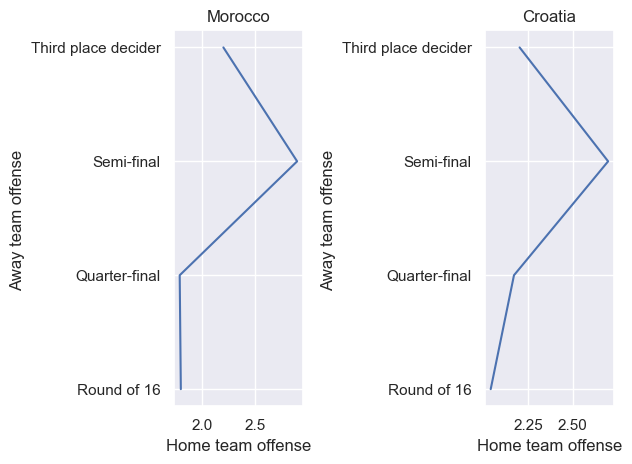

In [ ]:
plt.subplot(1,2,1)
plt.plot('home_offense', 'stage', data=dfMorocco)
plt.title("Morocco")
plt.xlabel('Home team offense')
plt.ylabel('Away team offense ')

plt.subplot(1,2,2)
plt.plot('home_offense', 'stage', data=dfCroatia)
plt.title("Croatia")
plt.xlabel('Home team offense')
plt.ylabel('Away team offense ')

plt.tight_layout()

### Observations

The changing offensive rating for Croatia and Morocco. Two things to consider is that Croatia was the away team in the round of 16, home team in the quarter final, and home team in the third place decider. Morocco was the home team in the round of 16, and quarter-final, and the away team in the semi-final and third place decider.

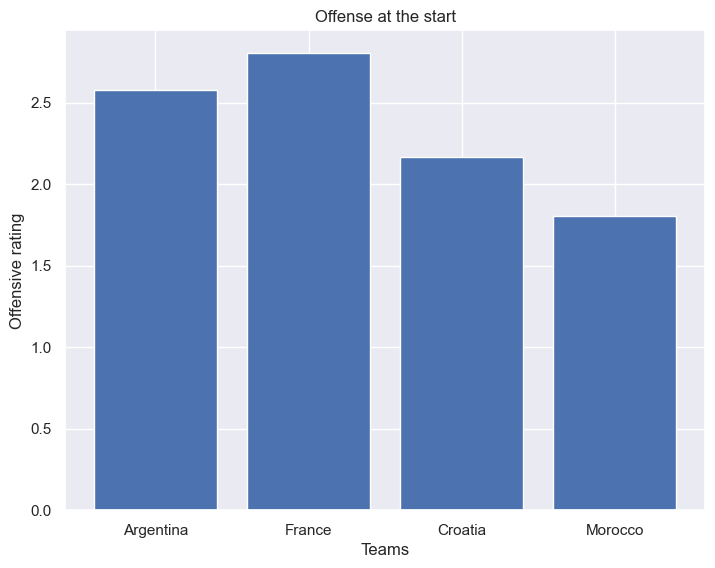

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Offense at the start')
ax.set_ylabel('Offensive rating')
ax.set_xlabel('Teams')
finalFour = ['Argentina', 'France', 'Croatia', 'Morocco']
finalFourOffense = [2.57620,2.80437,2.16748,1.80298]
ax.bar(finalFour,finalFourOffense)
plt.show()

### Observations

The comparison of the four finalists in the tournament at the start of the knockout stage. France had the highest offensive rating among these teams. And Morocco had the lowest offensive rating among these teams.

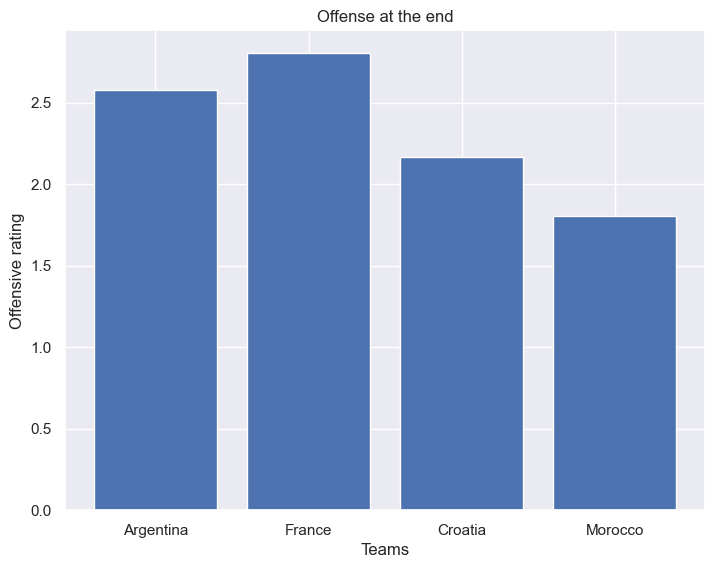

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Offense at the end')
ax.set_ylabel('Offensive rating')
ax.set_xlabel('Teams')
finalOffense = [2.83610,2.96765,2.20264,1.74313]
ax.bar(finalFour,finalFourOffense)
plt.show()

### Observations

The comparison of the four finalists in the tournament after it has ended. France still had the highest offensive rating, it even increased a little bit, even though they did not win the tournament. And Morocco still had the lowest offensive rating, given that they lost to France in the semi-final, and Croatia in the third place decider.

### Further analysis on revised research question

Notes to consider:
Argentina is mostly the home team (3 out of 4 times), away team during the Quarter-finals against Netherlands.
France is evenly on both sides of the team (2 home and 2 away), alternating between home team, away team, home team and away team, on their way to the finals.
Morocco is evenly on both sides of the team (2 home and 2 away), started with home team until the Semi-final when they were switched to the away team.
Croatia is evenly on both sides of the team (2 home and 2 away), alternating between away team, home team, away team, and home team until the thid place decider.

----

The plot titled `Change in offensive rating` suggests that home teams increases their offensive capabilities while on the other hand the away team decreases their offensive capabilities as the tournament progresses. One factor that was not taken into account is, which team is the home team or away team, as generally the home team won majority of the games they played (81% win rate for the home teams). But we can also conclude logically that no team's offense will fall off as the graph implies. This is because the line shown is the average of all the offensive ratings (of the teams in the knockout stage). 

Another point to note is that Argentina ramped up their offensive capabilities as thei went on their way to win the 2022 World Cup. On the other hand, the same can be said for the runner-up of France, which had a higher peak in offense than Argentina's peak during the tournament.

However, Morocco is a different story. Altough the team went on to win third-place in a decider match, their offense only decreased since the start of the knockout stage. On the other hand, even though Croatia lost to Morocco in the third-place decider match, their offensive rating increased, which might suggests that the team was exhausted to have played all the matches leading up to the decider match for third-place.

While we can deduce how we a team's offense might vary depending on external and internal factors, it simply does not tell the whole story of the team in question. Most players in the dataset have an overall rating of 62 to 70, and if you combine good players together, you can make a great team. Nevertheless, the most important quality of a player is to be willing to sacrifice for the bigger picture, which indicates that the teams with a good offense mesh well together. Meaning that they work well together, are self-less in helping the team win, putting priority on the team's success over their individual performances. 
